# What We Can Do to Reduce CO2 Emissions

# ![](data/cover.png)

## 📖 Abstract
We have two datasets of interest that we would like to unravel. The first dataset regards CO2 emissions from vehicles. After analysis, we advocate for the most valuable fuel type as well as make recommendations for car purchases.

The second dataset is about bicycle brands available storewide. A store owner wants to understand the brand and type of bicycles that their store specializes in so we provide a statistical analysis. The conclusions explain their revenue source and the patterns behind their sales.

## 1️⃣ CO2 Emissions

## 📖 Background
You volunteer for a public policy advocacy organization in Canada, and your colleague asked you to help her draft recommendations for guidelines on CO2 emissions rules. 

After researching emissions data for a wide range of Canadian vehicles, she would like you to investigate which vehicles produce lower emissions.

## 💾 The data I

### You have access to seven years of CO2 emissions data for Canadian vehicles ([source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6)):

- "Make" - The company that manufactures the vehicle.
- "Model" - The vehicle's model.
- "Vehicle Class" - Vehicle class by utility, capacity, and weight.
- "Engine Size(L)" - The engine's displacement in liters.
- "Cylinders" - The number of cylinders.
- "Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.
- "Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.
- "Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).
- "CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving. 

The data comes from the Government of Canada's open data [website](https://open.canada.ca/en).

## 📋 Report
Today we would like to determine how to minimize the CO2 emissions of our vehicles. We begin by first examining the characteristics of different fuel types and then go on to examine different vehicles. Finally, we model our results to propose suggestions for new and returning customers to the Canadian cars market.

In [149]:
%%capture
!pip install --upgrade pip
!pip install plotnine

In [150]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as ggplot2

def nrow(df):
    return len(df.index)

# Load the data
cars = pd.read_csv('data/co2_emissions_canada.csv')

fuel_dict = {
    "X" : "Regular gasoline", 
    "Z" : "Premium gasoline", 
    "D" : "Diesel", 
    "E" : "Ethanol (E85)", 
    "N" : "Natural gas"
}

cars['Vehicle Fuel Type'] = cars.loc[:, 'Fuel Type'].apply(lambda x: fuel_dict.get(x, x))
cars['Blank'] = ""

# Preview the dataframe
cars

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Vehicle Fuel Type,Blank
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196,Premium gasoline,
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221,Premium gasoline,
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136,Premium gasoline,
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255,Premium gasoline,
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244,Premium gasoline,
...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,219,Premium gasoline,
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,232,Premium gasoline,
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,240,Premium gasoline,
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,232,Premium gasoline,


## Different Fuel Types
To begin, we might ask ourselves how much power we need from a vehicle. If we wish to take a look at what most people need, let's consider what is available. The Canadian car market tends to favor cars that fall between 2.0L and 3.8L so we find that the median is 3.0L, right down the middle for the average driver. There is also a smaller demand for cars at and above 4.0L that likely befits truckers and heavy duty workers.

In [151]:
### Seaborn equivalent provided for ease of learning
sns_boxplot_code = '''
median_size = np.median(cars['Engine Size(L)'])

median_plot = sns.violinplot(
    data=cars, x='Engine Size(L)', color="#c8bfe7", inner=None, linewidth=0, 
    saturation=1.0
)
sns.boxplot(
    data=cars, x='Engine Size(L)', saturation=1.0, width=0.4, color="#99d9ea", 
    boxprops={'zorder': 2}, ax=median_plot
)

plt.title("Distribution of Engine Sizes")
plt.show()
'''

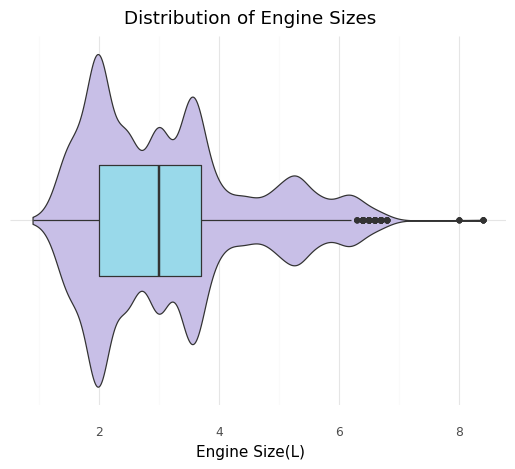

<ggplot: (8791721262038)>

In [152]:
engine_size_fig = (
    ggplot2.ggplot(cars) +
    ggplot2.aes(x = "Blank", y = "Engine Size(L)") +
    ggplot2.geom_violin(adjust = 1, scale = "area", fill = "#c8bfe7") +
    ggplot2.geom_boxplot(width = .3, shape = "circle", fill = "#99d9ea") +
    ggplot2.coord_flip() +
    ggplot2.xlab("") +
    ggplot2.ggtitle("Distribution of Engine Sizes") +
    ggplot2.theme_minimal()
)

engine_size_fig

One important metric that determines CO2 emissions produced by cars is the fuel consumption of the vehicle. Not only is it beneficial for the environment that we use less fuel, but consumers will find that it is cheaper to maintain the vehicle that way. On average, we find that most vehicles that run on ethanol burn through their fuel faster than gasoline or diesel.

However, for clarity's sake, I would stress that while the fuel consumption comb indicates the volume of fuel that is consumed, it is not an indicator of the propulsion produced. Different cars weight different amounts so a larger car would get less momentum than a smaller car and thus consume more fuel for the same journey. This would again advocate to get a car that is smaller and only as big as necessary.

In [153]:
### Seaborn equivalent provided for ease of learning
seaborn_barplot = '''
fig = (cars
    .groupby(cars['Vehicle Fuel Type'])
    .mean()
    .reset_index()
    .pipe((sns.barplot, "data"), x="Fuel Consumption Comb (L/100 km)", y="Vehicle Fuel Type"))

plt.title("Average Fuel Consumption per Type")
plt.show()
'''

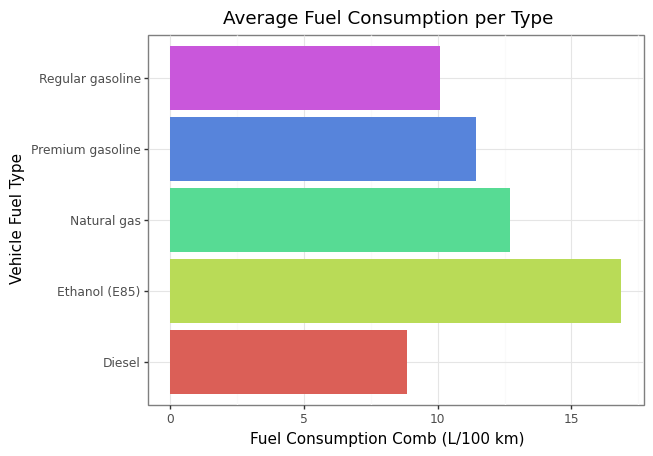

<ggplot: (8791721457797)>

In [154]:
average_fuel_fig = (
    ggplot2.ggplot(cars) + 
    ggplot2.aes(y="Fuel Consumption Comb (L/100 km)", x="Vehicle Fuel Type", fill = "Vehicle Fuel Type") + 
    ggplot2.stat_summary(geom = "bar", fun_data = "mean_sdl") + 
    ggplot2.coord_flip() + 
    ggplot2.ggtitle("Average Fuel Consumption per Type") + 
    ggplot2.theme_bw() + 
    ggplot2.theme(legend_position = "none")
)

average_fuel_fig

Before we get into the details regarding different sized cars, let's verify the correlation between fuel consumption and CO2 emissions. Since there are multiple fuel types, we facet these into separate graphs first. This helps us realize that there is a very strong positive correlation between the fuel consumed and the amount of CO2 emissions.

This makes sense intuitively because the amount of emissions from a substance is an immutable physical property that depends on the molecular structure. Therefore, we can account for all variance being from byproducts that are emitted by fuel additives such as knock agents and antifreeze.

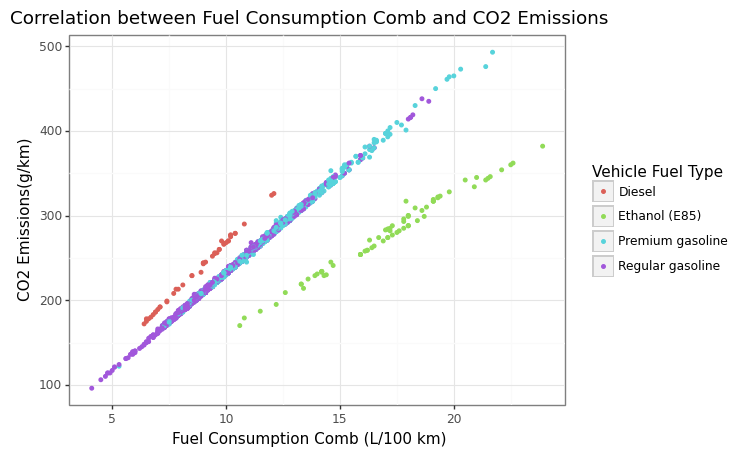

<ggplot: (8791721215103)>

In [155]:
fig = (
    ggplot2.ggplot(cars[1::5]) +
    ggplot2.aes(x = "Fuel Consumption Comb (L/100 km)", y = "CO2 Emissions(g/km)", 
                fill = "Vehicle Fuel Type", colour = "Vehicle Fuel Type", group = "Vehicle Fuel Type") +
    ggplot2.geom_point(size = 1) +
    ggplot2.ggtitle("Correlation between Fuel Consumption Comb and CO2 Emissions") + 
    ggplot2.theme_bw()
)

fig

To further solidify this point, the correlation coefficient for each fuel type is at least 99% for all of them, each resulting in the very strong lines in the above plot.

For convenience, we can make a derived feature where the amount of kilograms of CO2 per liter is derived from the two features shown in the plot. The slope represents the CO2 emissions (g/km) divided by the fuel consumption comb (L/100km). Therefore, the slope is the CO2 emissions produced per liter (kg/L). As discussed previously, the intercept is zero because it is a physical chemical property. The following proof is provided for clarity.

$$y = mx + b$$
$$b = 0$$
$$m = {y \over x} = {{g/km} \over {L/100 km}} = {{100 g*km} \over {L * km}} = {{100 g} \over {L}} = {{100 g} \over {L}} * {{1 kg} \over {1000 g}} = {{kg} \over {10 L}}$$
$$m = 0.1 * {{kg} \over {L}}$$

Most importantly, this means that rate of CO2 emission is specific to the fuel type. According to our results, diesel produces the most CO2 emissions at 2.69 kg/L whereas ethanol produces the least CO2 emissions at 1.60 kg/L. Both regular and premium gasoline produce similar CO2 emissions, around 2.32 - 2.33 kg/L, which ranks gasoline between ethanol and diesel. If a chemist looks up the chemistry reference tables for the combustion of ethanol, they will find that this data driven approach of deriving these values matches their own reference tables.

From my experience, diesel is a very dirty fuel when it burns so seeing these numbers makes sense to me. Having a biochemistry background also helps. Perhaps in the best case scenario, we can move to more vehicles using ethanol than gasoline. At the very least, we should reduce the production of diesel vehicles as much as possible.

Hypothetically, natural gas may have the second lowest emissions but there exists only one vehicle that uses natural gas, the Chevrolet Impala Dual Fuel. This is likely due to difficulty of either acquiring or using it in a car engine. The credibility of this is suspect however, because it is a dual engine and the sample size is only one observation. The calculation was made by extrapolation using a leverage point at (0, 0) to estimate this value.

In [156]:
# Drop artificial leverage point
cars.drop(cars[cars['Make'] == 'TEMP'].index, inplace=True)

# Add leverage point for natural gas because it only has 1 observation
cars = cars.append({'Make' : 'TEMP', 'Fuel Type' : 'N', 'Fuel Consumption Comb (L/100 km)': 0, 'CO2 Emissions(g/km)': 0}, ignore_index = True)

correlation = [
    sp.stats.pearsonr(
        cars[cars['Fuel Type'] == f].loc[:, 'Fuel Consumption Comb (L/100 km)'], 
        cars[cars['Fuel Type'] == f].loc[:, 'CO2 Emissions(g/km)']
    ) for f in cars['Fuel Type'].unique()
]

slopes = [
    sp.stats.linregress(
        cars[cars['Fuel Type'] == f].loc[:, 'Fuel Consumption Comb (L/100 km)'], 
        cars[cars['Fuel Type'] == f].loc[:, 'CO2 Emissions(g/km)']
    ) for f in cars['Fuel Type'].unique()
]

# Drop artificial leverage point
cars.drop(cars[cars['Make'] == 'TEMP'].index, inplace=True)

correlationData = pd.DataFrame({
    'Vehicle Fuel Type' : cars['Fuel Type'].apply(lambda x: fuel_dict.get(x, x)).unique(), 
    # y = mx ; therefore m = y/x ; therefore m = CO2 / Consumption Comb ; therefore m = (g/km) / (L/100km) = 100g/L = 0.1 kg/L
    'CO2 Produced By Consumption (kg/L)' : [0.1 * x[0] for x in slopes], 
    'Correlation Coefficient' : [x[0] for x in correlation]
})

correlationData

,Vehicle Fuel Type,CO2 Produced By Consumption (kg/L),Correlation Coefficient
0,Premium gasoline,2.323695,0.998670
1,Diesel,2.689918,0.999210
2,Regular gasoline,2.327221,0.999104
3,Ethanol (E85),1.603766,0.990724
4,Natural gas,1.677165,1.000000


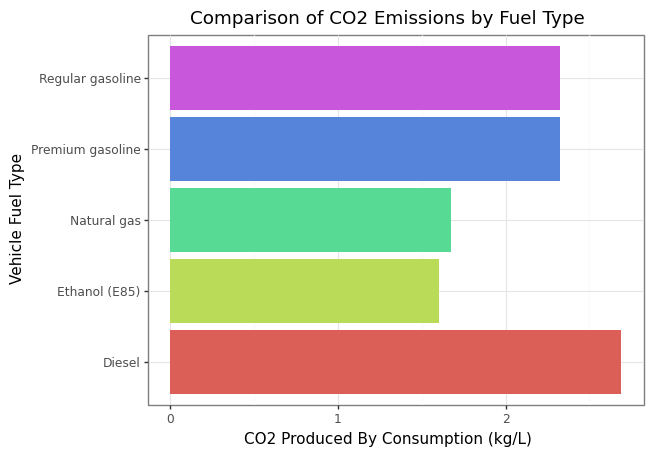

<ggplot: (8791721160714)>

In [157]:
fig = (
    ggplot2.ggplot(correlationData) + 
    ggplot2.aes(y="CO2 Produced By Consumption (kg/L)", x="Vehicle Fuel Type", fill = "Vehicle Fuel Type") + 
    ggplot2.stat_summary(geom = 'bar', fun_data = 'mean_sdl') + 
    ggplot2.coord_flip() + 
    ggplot2.ggtitle("Comparison of CO2 Emissions by Fuel Type") + 
    ggplot2.theme_bw() + 
    ggplot2.theme(legend_position = "none")
)

fig

In [158]:
### One approach that was considered was using a linear regression model
### However, since our data was univariate, this introduces extra complexity that didn't generate any new insights
### Therefore, while excluded from the analysis, it is provided for developer access as a gift

lm = '''
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Drop artificial leverage point
artificialData = cars[cars['Make'] == 'TEMP'].index
cars.drop(artificialData , inplace=True)

# Add leverage point for natural gas because it only has 1 observation
cars = cars.append({'Make' : 'TEMP', 'Fuel Type' : 'N', 'Fuel Consumption Comb (L/100 km)': 0, 'CO2 Emissions(g/km)': 0}, ignore_index = True)

# Blank dictionaries to populate
lm_fits = {}
lm_intercepts = {}
lm_r2 = {}
cars['Residuals'] = 0
cars['AdjResiduals'] = 0

for fuel in cars['Fuel Type'].unique():
    df = cars[cars['Fuel Type'] == fuel]
    
    # Create the model
    reg = LinearRegression()

    # Fit the model to the data
    reg.fit(np.reshape(df[['Fuel Consumption Comb (L/100 km)']], [-1, 1]), np.reshape(df[['CO2 Emissions(g/km)']], [-1, 1]))

    lm_fits[fuel] = reg.coef_[0][0]
    lm_intercepts[fuel] = reg.intercept_[0]
    lm_r2[fuel] = r2_score(np.reshape(df[['CO2 Emissions(g/km)']], [-1, 1]), reg.coef_ * np.reshape(df[['Fuel Consumption Comb (L/100 km)']], [-1, 1]))
    
    prediction = reg.predict(np.reshape(df[['Fuel Consumption Comb (L/100 km)']], [-1, 1]))
    res_diff = np.reshape(df[['CO2 Emissions(g/km)']], [-1, 1]) - prediction
    residual = np.where(res_diff > 0, 1, -1) * np.sqrt(np.abs(res_diff))
    
    cars_res_col = cars.columns.get_loc('Residuals')
    cars_adjr_col = cars.columns.get_loc('AdjResiduals')
    
    for i, superset_index in enumerate(residual.index):
        cars.iloc[superset_index, cars_res_col] = residual.iloc[i, 0]
        cars.iloc[superset_index, cars_adjr_col] = residual.iloc[i, 0] + reg.coef_[0][0]

# Drop artificial leverage point
artificialData = cars[cars['Make'] == 'TEMP'].index  # Hmmm
cars.drop(artificialData, inplace=True)

print(lm_fits)
print(lm_intercepts)
print(lm_r2)
'''

In [159]:
lm_plot = '''
(
ggplot2.ggplot(cars) +
    ggplot2.aes(x = 'Fuel Consumption Comb (L/100 km)', y = 'AdjResiduals', colour = 'Fuel Type') +
    ggplot2.geom_point(size = 1.5) +
    ggplot2.scale_color_hue(direction = 1) +
    ggplot2.geom_hline(yintercept = lm_fits.values(), linetype = "dashed") +
    ggplot2.theme_minimal()
)
'''

## Diverse Vehicle Classes
Let's now start to look at the fine grained details about the different classes of vehicles. Of the vehicles available, let's suppose that you are deciding between a Small SUV or a Mid-Size vehicle. They are both similar vehicles. In light of producing as little CO2 emissions as possible, the Mid-Size produces less CO2 emissions on average than the Small SUV vehicles available.

In fact, out of all vehicle classes, the Small Station Wagons seem to be the most CO2 emission friendly vehicle of all. However, this is ironically subverted because some of the more "efficient" Station Wagons are also diesel engines and none of them are ethanol engines, prompting us to filter the data more. Additionally, we should avoid using vans as much as possible.

In [160]:
(
    cars
    .groupby(["Vehicle Class"], dropna=True, as_index=False)
    .mean()
    .sort_values(by="CO2 Emissions(g/km)", ascending=True)
)

,Vehicle Class,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
9,STATION WAGON - SMALL,1.923413,4.146825,8.542857,200.067460
0,COMPACT,2.472994,4.887476,9.343933,216.679061
2,MID-SIZE,2.888967,5.200353,9.609356,222.455428
11,SUV - SMALL,2.513558,4.633525,10.231800,236.292523
3,MINICOMPACT,2.938957,5.628834,10.168712,236.607362
7,SPECIAL PURPOSE VEHICLE,2.311688,4.155844,10.763636,237.597403
8,STATION WAGON - MID-SIZE,3.115094,5.698113,10.232075,238.698113
10,SUBCOMPACT,3.049340,5.660066,10.574422,246.448845
4,MINIVAN,3.405000,5.800000,11.935000,262.312500
1,FULL-SIZE,3.700469,6.553991,11.633646,263.316119


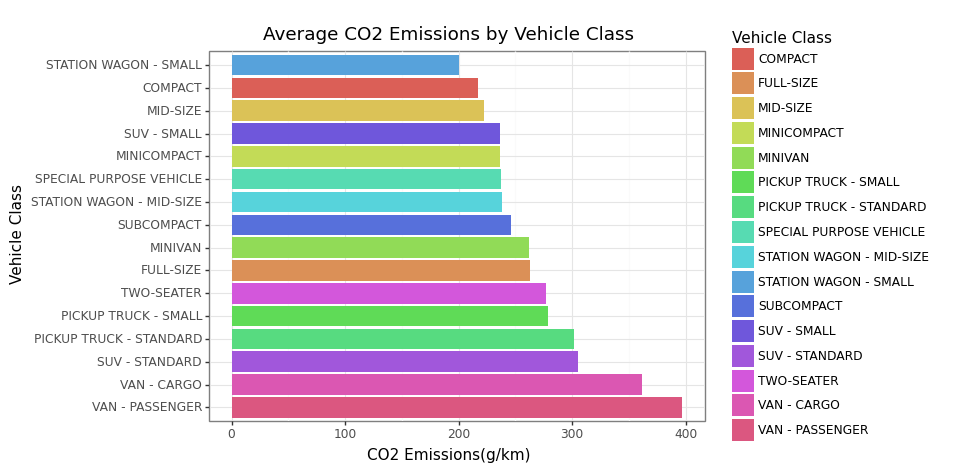

<ggplot: (8791721263029)>

In [161]:
emissions_order = (
    cars
    .groupby(["Vehicle Class"], dropna=True, as_index=False)
    .mean()
    .sort_values(by="CO2 Emissions(g/km)", ascending=False)['Vehicle Class']
    .tolist()
)

fig = (
    ggplot2.ggplot(cars) + 
    ggplot2.aes(y="CO2 Emissions(g/km)", x="Vehicle Class", fill = "Vehicle Class") + 
    ggplot2.stat_summary(geom = 'bar', fun_data = 'mean_sdl') + 
    ggplot2.scale_x_discrete(limits=emissions_order) + 
    ggplot2.coord_flip() + 
    ggplot2.ggtitle("Average CO2 Emissions by Vehicle Class") + 
    ggplot2.theme_bw()
)

fig

Let's instead check the CO2 emissions if we imposed the criteria of vehicles with 2.0L or smaller engine sizes. Among this subset of small engines, there are several competitive options available. The mean of this subset is 198 g/km which means we reduced our emissions by 20% from 250 g/km. Overall, any vehicle with simply a 2.0L engine seems to performs well.

However, for our CO2 initiative, there are three distinct vehicle types we expect to market to the population. These are the Small SUV, the Mid-Size, and the Compact. The Mercedes-Benz GLA 250 4MATIC is a curious outlier because it falls far below the expected threshold of other ethanol engines. Overall, I would highly recommend the Small SUV with ethanol engine because their average is drastically below other ethanol vehicles.

In [162]:
all_mean = cars.loc[:, "CO2 Emissions(g/km)"].mean()
all_2L_mean = cars[cars['Engine Size(L)'] <= 2.0].loc[:, "CO2 Emissions(g/km)"].mean()
eth_mean = cars[cars['Fuel Type'] == 'E'].loc[:, "CO2 Emissions(g/km)"].mean()
eth_2L_mean = cars[np.logical_and(cars['Fuel Type'] == 'E', cars['Engine Size(L)'] <= 2.0)].loc[:, "CO2 Emissions(g/km)"].mean()
all_mean, all_2L_mean, eth_mean, eth_2L_mean

(250.58469871360867, 198.26783530370975, 275.0918918918919, 180.4090909090909)

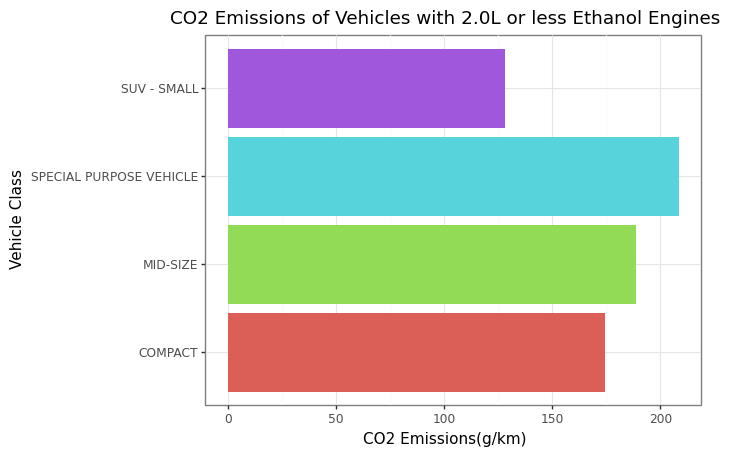

<ggplot: (8791721027066)>

In [163]:
fig = (
    ggplot2.ggplot(cars[np.logical_and(cars['Fuel Type'] == 'E', cars['Engine Size(L)'] <= 2.0)]) + 
    ggplot2.aes(y="CO2 Emissions(g/km)", x="Vehicle Class", fill = "Vehicle Class") + 
    ggplot2.stat_summary(geom = 'bar', fun_data = 'mean_sdl') + 
    ggplot2.coord_flip() + 
    ggplot2.ggtitle("CO2 Emissions of Vehicles with 2.0L or less Ethanol Engines") + 
    ggplot2.theme_bw() + 
    ggplot2.theme(legend_position = "none")
)

fig

## Conclusions
In summary, it is highly recommended to buy a car that is only as big as the demands that will be required. Additionally, it is highly recommended to look for a car that uses ethanol to both save money and reduce CO2 emissions. The best option is the Small SUV but some competitive options include the Mid-Size and Compact. Generally, you can't go wrong if you look for a 2.0L size engine. Provided below is a catalog with recommendations for you.

Truthfully, I want to push for ethanol engines even though some gasoline engines have a fuel consumption comb that are very low. I believe that the ethanol engines will be more sustainable, cleaner, easier to produce, and the previous CO2 emissions information also supports my claim about sustainability. Therefore, I highly suggest flexible fuel vehicles, or FFV, such as the Ford Focus FFV, the Chrysler 200 FFV, and the Dodge Dart FFV. Heavy duty drivers are recommended the Ford F-150 FFV Pickup Truck.

In [164]:
cars[
    np.logical_and(np.logical_and(
        cars['Fuel Type'] == 'E', 
        cars['Engine Size(L)'] <= 3.4), 
        cars["CO2 Emissions(g/km)"] < all_mean
    )
].iloc[:, [0, 1, 2, 3, 4]].drop_duplicates()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders
318,DODGE,DART FFV,MID-SIZE,2.0,4.0
402,FORD,FOCUS FFV,COMPACT,2.0,4.0
408,FORD,FOCUS SFE FFV,COMPACT,2.0,4.0
1316,CHEVROLET,EQUINOX FFV,SUV - SMALL,2.4,4.0
1320,CHEVROLET,EQUINOX AWD FFV,SUV - SMALL,2.4,4.0
1374,CHRYSLER,200 FFV,MID-SIZE,2.4,4.0
1547,GMC,TERRAIN FFV,SUV - SMALL,2.4,4.0
1665,JEEP,CHEROKEE FFV,SUV - SMALL,2.4,4.0
1669,JEEP,CHEROKEE 4X4 FFV,SUV - SMALL,2.4,4.0
1696,JEEP,RENEGADE FFV,SUV - SMALL,2.4,4.0


## 2️⃣ Understanding the bicycle market 

## 📖 Background
You work for a chain of bicycle stores. Your new team leader comes from a different industry and wants your help learning about the bicycle market. Specifically, they need to understand better the brands and categories for sale at your stores.

## 💾 The data II

### You have access to the following tables:

#### products
- "product_id" - Product identifier.
- "product_name" - The name of the bicycle.
- "brand_id" - You can look up the brand's name in the "brands" table.
- "category_id" - You can look up the category's name in the "categories" table.
- "model_year" - The model year of the bicycle.
- "list_price" - The price of the bicycle.

#### brands
- "brand_id" - Matches the identifier in the "products" table.
- "brand_name" - One of the nine brands the store sells.

#### categories
- "category_id" - Matches the identifier in the "products" table.
- "category_name" - One of the seven product categories in the store.

## 📋 Report
To begin, we will first evaluate what options are available at this store so that we can understand our customers better. The bicycle market is very popular in densely populated cities as suburban and urban areas continue to invest in bike lanes. Additionally, we can observe that bikes are extremely customizable for anyone between a student and an experienced professional. So who is our audience?

## Statistical Assessment
According to our data, the cheapest bike will cost \$90 for a child's bicycle. Also, the most expensive bike is geared towards athletes and the most expensive road bike costs \$12,000. Depending on who you are, I think most people will fall somewhere in the middle but the option will be there no matter what.

In [165]:
-- Queries for the most expensive item
WITH expensive AS (
	SELECT *
	FROM products
	WHERE list_price = (SELECT MAX(list_price) FROM products)
), 
-- Queries for the least expensive item
cheap AS (
	SELECT *
	FROM products
	WHERE list_price = (SELECT MIN(list_price) FROM products)
),
-- Combines both tables together
combined AS (
	SELECT *
	FROM expensive
	UNION
	SELECT *
	FROM cheap
)
-- Completes the query by joining brand id and category id
SELECT 
	p.product_id AS "Product ID",
	p.product_name AS "Product Name",
	b.brand_name AS "Brand Name",
	c.category_name AS "Category Name",
	p.model_year AS "Model Year",
	p.list_price AS "List Price"
FROM combined as p
LEFT JOIN brands AS b ON p.brand_id = b.brand_id
LEFT JOIN categories AS c ON p.category_id = c.category_id

,Product ID,Product Name,Brand Name,Category Name,Model Year,List Price
0,155,Trek Domane SLR 9 Disc - 2018,Trek,Road Bikes,2018,11999.99
1,263,Strider Classic 12 Balance Bike - 2018,Strider,Children Bicycles,2018,89.99


Shown below, the bicycle category with the most bikes would be Cruiser Bicycles. At 78 unique cruiser bikes, these must be popular because people often have to travel every weekday. In contrast, the cyclocross bicycles have the lowest number of different bikes at only 10 different bikes. Perhaps with a good marketing pitch, it means that there is room for new competition here.

In [166]:
-- Perform aggregation of bicycles count per category
WITH category_counts AS (
	SELECT 
		category_id, 
		COUNT(product_id) AS product_count
	FROM products
	GROUP BY category_id
)
-- Query with pretty print and join for category name
SELECT 
	c.category_name AS "Bicycle Category",
	cntc.product_count AS "Count of Unique Bicycles"
FROM category_counts AS cntc
LEFT JOIN categories AS c ON cntc.category_id = c.category_id

,Bicycle Category,Count of Unique Bicycles
0,Children Bicycles,59
1,Comfort Bicycles,30
2,Cruisers Bicycles,78
3,Cyclocross Bicycles,10
4,Electric Bikes,24
5,Mountain Bikes,60
6,Road Bikes,60


,Bicycle Category,Count of Unique Bicycles
0,Children Bicycles,59
1,Comfort Bicycles,30
2,Cruisers Bicycles,78
3,Cyclocross Bicycles,10
4,Electric Bikes,24
5,Mountain Bikes,60
6,Road Bikes,60


Let's investigate what the most expensive bicycles are. When we perform data aggregation, electric bicycles cost \$3,282 on average. A close runner up are road bikes at \$3,175 and finally in third are cyclocross bicycles at \$2,543 average price. This implies that if we gear our products to the most expensive clientele, we will likely start by working with these three kinds of bikes.

In [168]:
-- Perform aggregation of average price per category
WITH category_price_average AS (
	SELECT 
		category_id, 
		AVG(list_price) AS price_average
	FROM products
	GROUP BY category_id
)
-- Select top 3 most expensive categories joined with category names
SELECT TOP 3
	c.category_name AS "Bicycle Category",
	avgp.price_average AS "Average Bicycle Price"
FROM category_price_average AS avgp
LEFT JOIN categories AS c ON avgp.category_id = c.category_id
ORDER BY avgp.price_average DESC

,Bicycle Category,Average Bicycle Price
0,Electric Bikes,3281.656666
1,Road Bikes,3175.357333
2,Cyclocross Bicycles,2542.793000


,Bicycle Category,Average Bicycle Price
0,Electric Bikes,3281.656666
1,Road Bikes,3175.357333
2,Cyclocross Bicycles,2542.793000


An additional consideration is what brand that we would expect to sell. It turns out that the three most expensive brands are Trek at an average price of \$2,500, Heller bikes at \$2,173 and finally Surly bicycles at \$1,332 average price listing. The disparity in average price is somewhat surprising since going from 1st to 3rd nearly halves the average price.

The average value in bikes across all three brands (\$2,500 at \#1) is also notably less than the average of all top three bicycle categories (\$2,543 at \#3). This implies that all of the brands have a broad range of options available and do not specialize exclusively in road bikes, for example. Intuitively, it makes sense that the successful brands have different bikes geared to all different audiences, which we would expect to do as the business grows.

In [170]:
-- Perform aggregation of average price per brand
WITH brand_price_average AS (
	SELECT 
		brand_id, 
		AVG(list_price) AS price_average
	FROM products
	GROUP BY brand_id
)
-- Select top 3 most expensive brands joined with category names
SELECT TOP 3
	b.brand_name AS "Bicycle Brand",
	avgp.price_average AS "Average Bicycle Price"
FROM brand_price_average AS avgp
LEFT JOIN brands AS b ON avgp.brand_id = b.brand_id
ORDER BY avgp.price_average DESC

,Bicycle Brand,Average Bicycle Price
0,Trek,2500.064074
1,Heller,2172.996666
2,Surly,1331.753600


,Bicycle Brand,Average Bicycle Price
0,Trek,2500.064074
1,Heller,2172.996666
2,Surly,1331.753600


## Distribution of Top Brands and Types
When we evaluate the three most prolific brands, selected for having the highest number of different bikes, we come to three candidates, Electra, Surly, and Trek. Electra specializes in low cost bicycles ranging from \$200 to \$1,000 and made 103 different bikes that fall inside this bracket. Surly has a broad band that is distributed evenly between \$400 to \$2,600 bicycles. And lastly, Trek covers the widest range of bicycles, from low end and high end with their two highest aggregates around the \$300 and \$3,300 marks according to the provided visualization.

One observation is excluded from the next two visualizations: the Trek Domane SLR 9 Disc road bike is an outlier that falls into the 60th price bracket, much higher than the second most expensive at the 37th price bracket.

In [172]:
-- Adds column to categorize prices into folds of $200 width
WITH brand_dist_bracket AS (
	SELECT 
		product_id,
		brand_id, 
		ROUND(list_price / 200, 0) AS price_dist
	FROM products
), 
-- Aggregates brands by price bracket and count per bracket
brand_dist AS (
	SELECT 
		brand_id,
		price_dist,
		COUNT(product_id) AS dist_count
	FROM brand_dist_bracket
	GROUP BY brand_id, price_dist
), 
-- Selects top 3 most prolific bicycle brands by highest count of products
brand_product_count AS (
	SELECT TOP 3
		brand_id, 
		COUNT(product_id) AS product_count
	FROM products
	GROUP BY brand_id
	ORDER BY product_count DESC
)
-- Shows distribution of top 3 prolific brands by price bracket
SELECT 
	b.brand_name AS "Bicycle Brand",
	dp.price_dist AS "Bicycle Price ($n / 200)",
	dp.dist_count AS "Aggregate Count",
	dp.price_dist * 200 AS "Minimum Price",
	(dp.price_dist + 1) * 200 AS "Maximum Price"
FROM brand_dist AS dp
-- Excludes bike brands to only select top 4 brands
INNER JOIN brand_product_count AS cntpb ON dp.brand_id = cntpb.brand_id
-- Appends the brand name
LEFT JOIN brands AS b ON dp.brand_id = b.brand_id
-- Excludes the Trek Domane SLR 9 Disc road bike
WHERE dp.price_dist != (SELECT ROUND(MAX(list_price) / 200, 0) FROM products)
ORDER BY dp.price_dist, dp.brand_id

,Bicycle Brand,Bicycle Price ($n / 200),Aggregate Count,Minimum Price,Maximum Price
0,Electra,1,17,200,400
1,Trek,1,16,200,400
2,Electra,2,31,400,600
3,Surly,2,4,400,600
4,Trek,2,14,400,600
5,Electra,3,27,600,800
6,Trek,3,1,600,800
7,Electra,4,28,800,1000
8,Surly,4,4,800,1000
9,Trek,4,3,800,1000


,Bicycle Brand,Bicycle Price ($n / 200),Aggregate Count,Minimum Price,Maximum Price
0,Electra,1,17,200,400
1,Trek,1,16,200,400
2,Electra,2,31,400,600
3,Surly,2,4,400,600
4,Trek,2,14,400,600
5,Electra,3,27,600,800
6,Trek,3,1,600,800
7,Electra,4,28,800,1000
8,Surly,4,4,800,1000
9,Trek,4,3,800,1000


Let's also consider the price distribution for different types of bicycles. It turns out that the four most prolific bicycle categories are children bicycles, cruisers, mountain bikes, and road bikes. As it happens, this same order describes where the peaks in these distributions lie. 

Children bikes tend to fall into very low end bikes mostly between \$200 and \$600. Next, cruisers are often between \$400 and \$1,000 in the midrange. Mountain bikes can sometimes reach the very high end, but more often falls between \$1,000 and \$1,600 range. Finally, road bikes have the most price diversity with several different peaks, initially beginning at around \$900 and making its fifth and final peak all the way at \$6,500. A bike for everyone!


In [174]:
-- Adds column to categorize prices into folds of $200 width
WITH category_dist_bracket AS (
	SELECT 
		product_id,
		category_id, 
		ROUND(list_price / 200, 0) AS price_dist
	FROM products
), 
-- Aggregates categories by price bracket and count per bracket
category_dist AS (
	SELECT 
		category_id,
		price_dist,
		COUNT(product_id) AS dist_count
	FROM category_dist_bracket
	GROUP BY category_id, price_dist
), 
-- Selects top 4 most prolific bicycle categories by highest count of products
category_product_count AS (
	SELECT TOP 4
		category_id, 
		COUNT(product_id) AS product_count
	FROM products
	GROUP BY category_id
	ORDER BY product_count DESC
)
-- Shows distribution of top 4 prolific categories by price bracket
SELECT 
	c.category_name AS "Bicycle Category",
	dp.price_dist AS "Bicycle Price ($n / 200)",
	dp.dist_count AS "Aggregate Count",
	dp.price_dist * 200 AS "Minimum Price",
	(dp.price_dist + 1) * 200 AS "Maximum Price"
FROM category_dist AS dp
-- Excludes bike categories to only select top 4 categories
INNER JOIN category_product_count AS cntpc ON dp.category_id = cntpc.category_id
-- Appends the category name
LEFT JOIN categories AS c ON dp.category_id = c.category_id
-- Excludes the Trek Domane SLR 9 Disc road bike
WHERE dp.price_dist != (SELECT ROUND(MAX(list_price) / 200, 0) FROM products)
ORDER BY dp.price_dist, dp.category_id

,Bicycle Category,Bicycle Price ($n / 200),Aggregate Count,Minimum Price,Maximum Price
0,Children Bicycles,0,1,0,200
1,Children Bicycles,1,33,200,400
2,Cruisers Bicycles,1,8,200,400
3,Children Bicycles,2,25,400,600
4,Cruisers Bicycles,2,18,400,600
5,Mountain Bikes,2,12,400,600
6,Cruisers Bicycles,3,22,600,800
7,Mountain Bikes,3,3,600,800
8,Cruisers Bicycles,4,21,800,1000
9,Mountain Bikes,4,5,800,1000


,Bicycle Category,Bicycle Price ($n / 200),Aggregate Count,Minimum Price,Maximum Price
0,Children Bicycles,0,1,0,200
1,Children Bicycles,1,33,200,400
2,Cruisers Bicycles,1,8,200,400
3,Children Bicycles,2,25,400,600
4,Cruisers Bicycles,2,18,400,600
5,Mountain Bikes,2,12,400,600
6,Cruisers Bicycles,3,22,600,800
7,Mountain Bikes,3,3,600,800
8,Cruisers Bicycles,4,21,800,1000
9,Mountain Bikes,4,5,800,1000


## Conclusions
Overall, the majority of the bikes that we have available are tailored to the common consumer. Adults come to buy their cruiser or mountain bike, which is our first main income source and is usually an Electra bike. Afterwards, these same adults likely buy their children bicycles as well. Electra and Trek both have a strong hold on children's bicycles and are even competitors to each other.

Our second major source of income is the high risk, high reward sales in road bikes. Our road bicycle sales come from almost exclusively Trek, a conclusion we can deduce given that the distribution between brand and category overlap strongly. This second type of customer, depending on which bracket they fall into can sometimes be as valuable as 4, 6, or 8 Electra customers and should have a dedicated section that caters to them.